<a href="https://colab.research.google.com/github/Sukriti-m/Autoencoder/blob/main/Image_Compressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

In [2]:
# load the dataset
(x_train, _), (x_test, _) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:

# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

# Exploratory Data Analysis

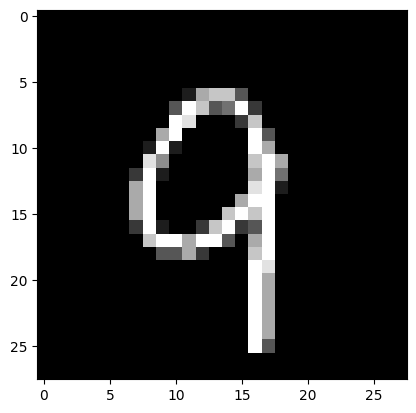

In [5]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

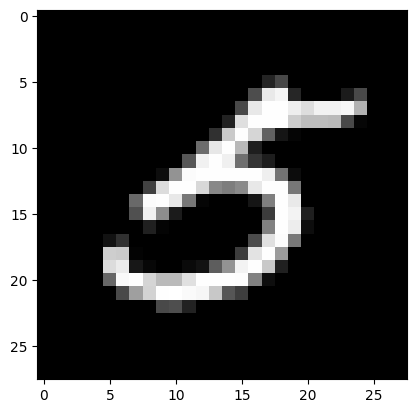

In [6]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

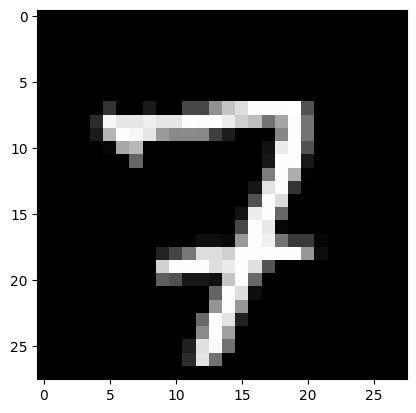

In [7]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

# Model Creation

In [8]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 16)        0

In [9]:
# train the model
model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))


Epoch 1/20
235/235 [==============================] - 102s 416ms/step - loss: 0.1799 - val_loss: 0.0864
Epoch 2/20
235/235 [==============================] - 85s 363ms/step - loss: 0.0827 - val_loss: 0.0787
Epoch 3/20
235/235 [==============================] - 80s 339ms/step - loss: 0.0778 - val_loss: 0.0758
Epoch 4/20
235/235 [==============================] - 81s 346ms/step - loss: 0.0756 - val_loss: 0.0740
Epoch 5/20
235/235 [==============================] - 84s 359ms/step - loss: 0.0742 - val_loss: 0.0736
Epoch 6/20
235/235 [==============================] - 80s 338ms/step - loss: 0.0732 - val_loss: 0.0723
Epoch 7/20
235/235 [==============================] - 81s 343ms/step - loss: 0.0724 - val_loss: 0.0714
Epoch 8/20
235/235 [==============================] - 80s 338ms/step - loss: 0.0718 - val_loss: 0.0711
Epoch 9/20
235/235 [==============================] - 80s 342ms/step - loss: 0.0713 - val_loss: 0.0705
Epoch 10/20
235/235 [==============================] - 80s 341ms/step - 

# Visualise Results

In [10]:
pred = model.predict(x_test)


313/313 [==============================] - 4s 13ms/step


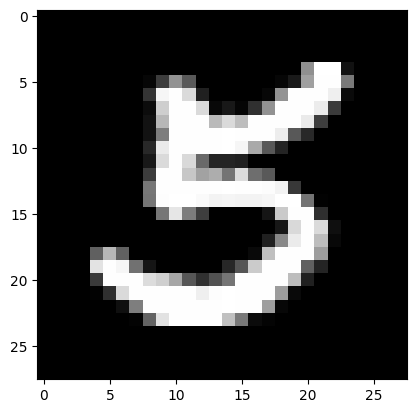

In [11]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()


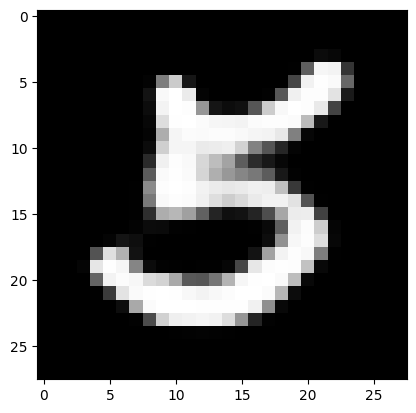

In [12]:
# visualise compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

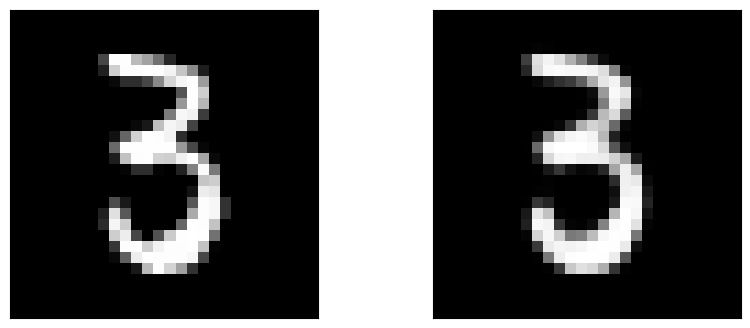

In [13]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

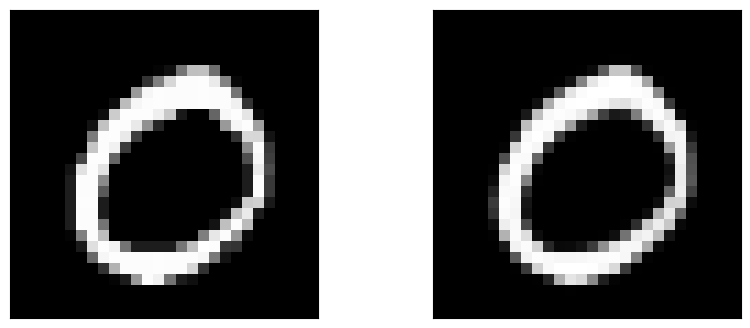

In [14]:

index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()